In [181]:
import math
import numpy as np
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [108]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

df = web.DataReader("AAPL", "yahoo", start, end)

In [109]:
dfreg = df.loc[:,["Adj Close","Volume"]]
dfreg["HL_PCT"] = (df["High"] - df["Low"]) / df["Close"] * 100.0
dfreg["PCT_change"] = (df["Close"] - df["Open"]) / df["Open"] * 100.0

In [133]:
forcast_range = 0.01

In [134]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(forcast_range * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = "Adj Close"
dfreg["label"] = dfreg[forecast_col].shift(-forecast_out)

In [135]:
X = np.array(dfreg.drop(["label"], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg["label"])
y = y[:-forecast_out]

In [184]:
clfReg = LinearRegression(n_jobs=-1)
clfReg.fit(X, y)

clfPoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfPoly2.fit(X, y)

# Quadratic Regression 3
clfPoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfPoly3.fit(X, y)

clfKnn = KNeighborsRegressor(n_neighbors=2)
clfKnn.fit(X, y)

clfLasso = Lasso(alpha=1)
clfLasso.fit(X,y)


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [168]:
confidenceReg = clfReg.score(X, y)
confidencePoly2 = clfPoly2.score(X,y)
confidencePoly3 = clfPoly3.score(X,y)
confidenceKnn = clfKnn.score(X,y)
confidenceLasso = clfLasso.score(X,y)

In [169]:
print(confidenceReg, confidencePoly2, confidencePoly3, confidenceKnn,confidenceLasso)

0.9670354750481035 0.9682907190120446 0.9695220864379399 0.9826618813761829 0.9647580738989454


In [139]:
forecast_set = clfreg.predict(X_lately)
#dfreg['Forecast'] = np.nan
dfreg['test'] =np.nan

In [172]:
forcast_Reg = np.insert(clfreg.predict(X),0,['NaN']*forecast_out)
forcast_Poly2 = np.insert(clfpoly2.predict(X),0,['NaN']*forecast_out)
forcast_Poly3 = np.insert(clfpoly3.predict(X),0,['NaN']*forecast_out)
forcast_Knn = np.insert(clfknn.predict(X),0, ['NaN']*forecast_out)
forcast_Lasso = np.insert(clfLasso.predict(X),0, ['NaN']*forecast_out)

In [173]:
dfreg['reg'] =forcast_Reg
dfreg['poly2'] = forcast_Poly2
dfreg['poly3'] = forcast_Poly3
dfreg['KNN'] = forcast_Knn
dfreg['Lasso'] = forcast_Lasso

In [174]:
dfreg.shape

(1770, 11)

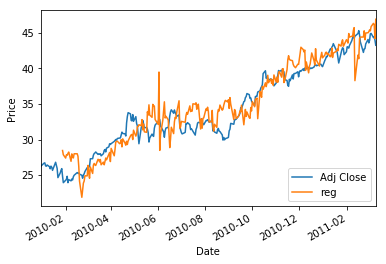

In [185]:
dfreg['Adj Close'].head(300).plot()
dfreg['reg'].head(300).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

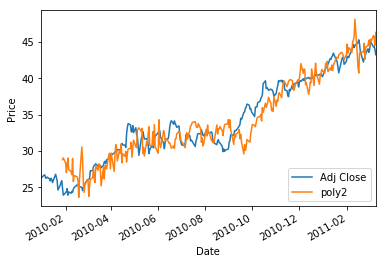

In [189]:
dfreg['Adj Close'].head(300).plot()
dfreg['poly2'].head(300).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

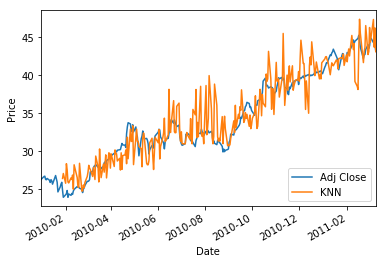

In [190]:
dfreg['Adj Close'].head(300).plot()
dfreg['KNN'].head(300).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

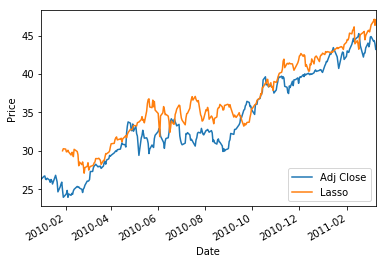

In [191]:
dfreg['Adj Close'].head(300).plot()
dfreg['Lasso'].head(300).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()